# Libraries


In [1]:
!pip install googlesearch-python

In [2]:
# Import necessary libraries
from googlesearch import search
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


# Define Search Query

In [3]:
# Provide the info for the query
query = "Tansa Systems"

# Google Search

In [4]:
# Perform Google search to get a list of SearchResult
# results = list(search(query, num_results=100, sleep_interval=5, lang="en"))
results = list(search(query, num_results=100, sleep_interval=5, lang="en",advanced=True))

results = [str(item) for item in results]

In [5]:
# Initialize an empty list to store search result data
data =[]
for result in results:
    # Extract URL, title, and description using string manipulation
    url = result.split("url=")[1].split(",")[0]
    title = result.split("title=")[1].split(",")[0]
    description = result.split("description=")[1].split(")")[0]

    # Create a dictionary for each SearchResult
    result_dict = {
        'URL': url,
        'Title': title,
        'Description': description
    }

    # Append the dictionary to the data list
    data.append(result_dict)

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                                                   URL  \
0                               https://www.tansa.com/   
1                               https://www.tansa.com/   
2    https://workspace.google.com/marketplace/app/t...   
3       https://www.linkedin.com/company/tansa-systems   
4    https://journalists.org/directory/tansa-system...   
..                                                 ...   
97   https://www.sourcesecurity.com/news/orion-entr...   
98   https://www.proff.no/roller/tansa-systems-as/o...   
99   https://www.tripadvisor.com/Attraction_Review-...   
100  https://www.isaffuari.com/en/tansa-turnstile-a...   
101                  https://soundcloud.com/tansa_info   

                                                 Title  \
0                                Tansa Systems | Clear   
1                                Tansa Systems | Clear   
2                 Tansa - Google Workspace Marketplace   
3                                        Tansa Systems   
4            

# Extract and Store Results in DataFrame

# Text Cleaning

In [6]:
# Define patterns for text cleaning (if necessary)
date_time_pattern = r'\d{4}-\d{2}-\d{2}'  # Example pattern for date
url_pattern = r'http\S+|www\S+'  # Pattern for URLs
short_words_pattern = r'\b\w{1,2}\b'  # Pattern for short words
stop_words_pattern = r'\b(?:the|and|is|in|to|a|of)\b'  # Example pattern for stop words
special_characters_pattern = r'[^\w\s]'  # Pattern for special characters

# Define custom words to be removed, considering capital and plural forms
custom_words = ['job', 'apply', 'search', 'find']
custom_words_pattern = r'\b(?:' + '|'.join(custom_words) + r's?\b)'

# Apply text cleaning on the "Description" column
df['Description'] = df['Description'].str.replace(date_time_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(url_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(short_words_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(stop_words_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(special_characters_pattern, '', regex=True)
df['Description'] = df['Description'].str.replace(custom_words_pattern, '', regex=True, case=False)

# Print the cleaned "Description" column
print(df['Description'])


0      Tansa   advanced text proofing system that can...
1      Tansa   advanced text proofing system that can...
2      Dec  2023  Write   higher standard Tansa   adv...
3        leading developer  advanced proofing tools  ...
4      Jun  2024  For more than two decades Tansa has...
                             ...                        
97     Jan  2022  Orion ECI   renowned based technolo...
98     Proff gir deg bedriftsinformasjon  Tansa Syste...
99     Ferries  MumbaiPublic Transportation Systems  ...
100     WILL   THE ISAF WITH ITS SECURITY SYSTEMS FOR...
101     systems They are usually only set  response  ...
Name: Description, Length: 102, dtype: object


# Create and Visualize Word Cloud

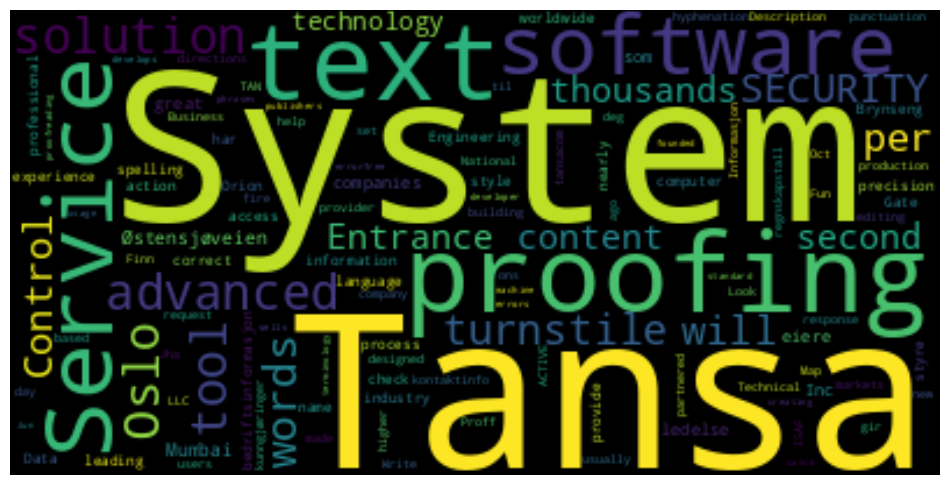

In [7]:
# Convert the "Description" column to a single string
text_data = ' '.join(df['Description'].astype(str))

# Create a word cloud from the descriptions
wordcloud = WordCloud(collocations=False).generate(text_data)

# Visualize the word cloud
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()